# 1. 분석준비

In [123]:
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 


In [4]:
data = pd.read_csv('clustering_data.csv')
data.drop(['Unnamed: 0'],axis = 1,inplace = True)
data

,CTY_NM,ratio,tot
0,강남구,117.501236,304
1,강동구,130.707905,201
2,강북구,255.741946,162
3,강서구,151.529412,325
4,관악구,232.544572,250
5,광진구,164.941084,158
6,구로구,180.530203,283
7,금천구,211.962286,167
8,노원구,155.835207,375
9,도봉구,214.057018,218


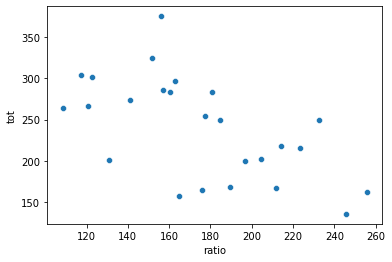

In [5]:
sns.scatterplot(x="ratio", y="tot", data=data, palette="Set2");

In [6]:
data2 = data.set_index(data['CTY_NM']).drop(['CTY_NM'],axis = 1)

# 2. 최적의 군집수 찾기

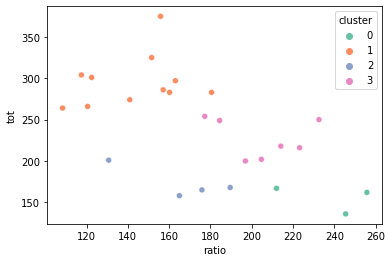

In [82]:
# k=4로 k-means clustering 실행
kmeans = KMeans(n_clusters=4)
kmeans.fit(data2)

# 결과 확인
result_by_sklearn = data2.copy()
result_by_sklearn["cluster"] = kmeans.labels_

result_by_sklearn.sort_values(by = 'cluster')
sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set2");

## 1) elbow method로 최적의 군집 수 찾기

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


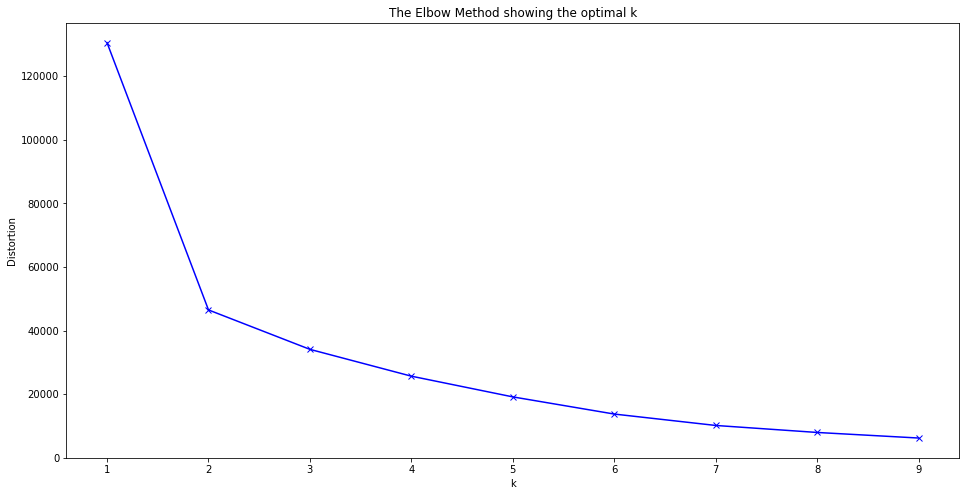

In [9]:
distortions = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data2)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

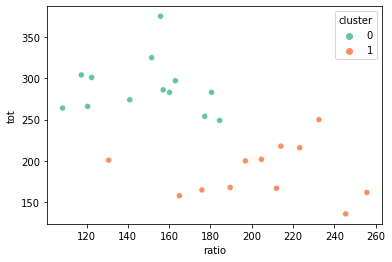

In [10]:
# k-means clustering 실행
kmeans = KMeans(n_clusters=2)
kmeans.fit(data2)

# 결과 확인
result_by_sklearn = data2.copy()
result_by_sklearn["cluster"] = kmeans.labels_

result_by_sklearn.sort_values(by = 'cluster')

sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set2");

- 더 많은 군집을 원하기 때문에 다른 방법 갈구

# 3. 스케일링
- 스케일링을 통해서 다른결과가 도출되는지 확인

## 1) StandardScaler 

In [39]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()   
scaler.fit(data2)
scaled_data = scaler.transform(data2)

In [40]:
scaled_data

#dataframe으로 만들기
scaled_data = pd.DataFrame(scaled_data, columns=data2.columns, index=list(data2.index.values))
scaled_data

array([[-1.44789193,  1.06104873],
       [-1.117684  , -0.65085633],
       [ 2.00855716, -1.2990534 ],
       [-0.59708137,  1.41007792],
       [ 1.42855044,  0.16354511],
       [-0.26174771, -1.36553515],
       [ 0.1280289 ,  0.71201954],
       [ 0.91392906, -1.21595121],
       [-0.48942305,  2.24109979],
       [ 0.9663039 , -0.3683089 ],
       [ 0.53781629, -0.66747677],
       [ 0.04606151,  0.23002686],
       [-0.86205106,  0.56243561],
       [ 0.01134235, -1.24919208],
       [-1.67599076,  0.39623123],
       [-0.45791398,  0.76188086],
       [-0.38017085,  0.71201954],
       [-1.32322083,  1.01118742],
       [-1.37204107,  0.42947211],
       [-0.31036602,  0.94470567],
       [ 0.35292418, -1.19933077],
       [ 0.226049  ,  0.14692467],
       [ 1.19432178, -0.40154977],
       [ 1.75093854, -1.73118477],
       [ 0.73075953, -0.6342359 ]])

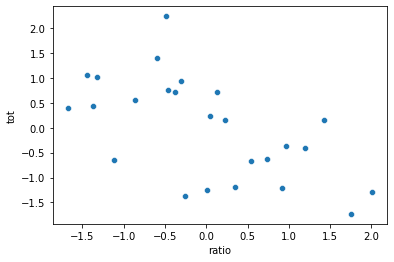

In [42]:
sns.scatterplot(x="ratio", y="tot", data=scaled_data, palette="Set2");

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


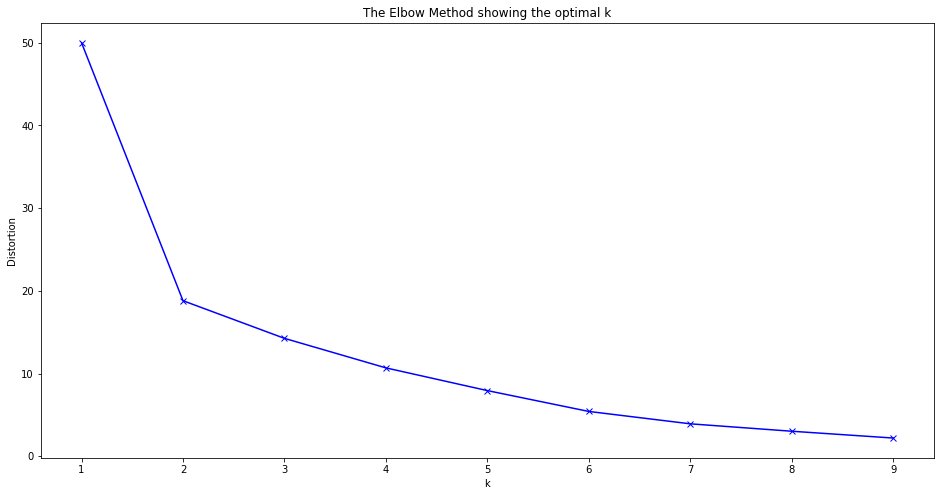

In [43]:
distortions = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

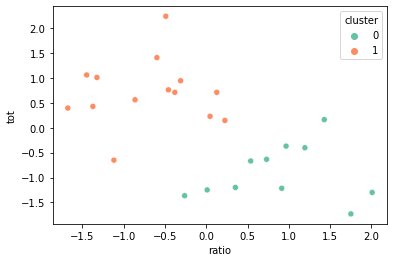

In [44]:
# k-means clustering 실행
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)

# 결과 확인
result_by_sklearn = scaled_data.copy()
result_by_sklearn["cluster"] = kmeans.labels_

result_by_sklearn.sort_values(by = 'cluster')

sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set2");

## 2) MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data2)
scaled_data = min_max_scaler.transform(data2)

In [47]:
scaled_data
#dataframe으로 만들기
scaled_data = pd.DataFrame(scaled_data, columns=data2.columns, index=list(data2.index.values))
scaled_data

sns.scatterplot(x="ratio", y="tot", data=scaled_data, palette="Set2");

,ratio,tot
강남구,0.061907,0.702929
강동구,0.151527,0.271967
강북구,1.000000,0.108787
강서구,0.292820,0.790795
관악구,0.842584,0.476987
광진구,0.383831,0.092050
구로구,0.489618,0.615063
금천구,0.702914,0.129707
노원구,0.322039,1.000000
도봉구,0.717129,0.343096


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


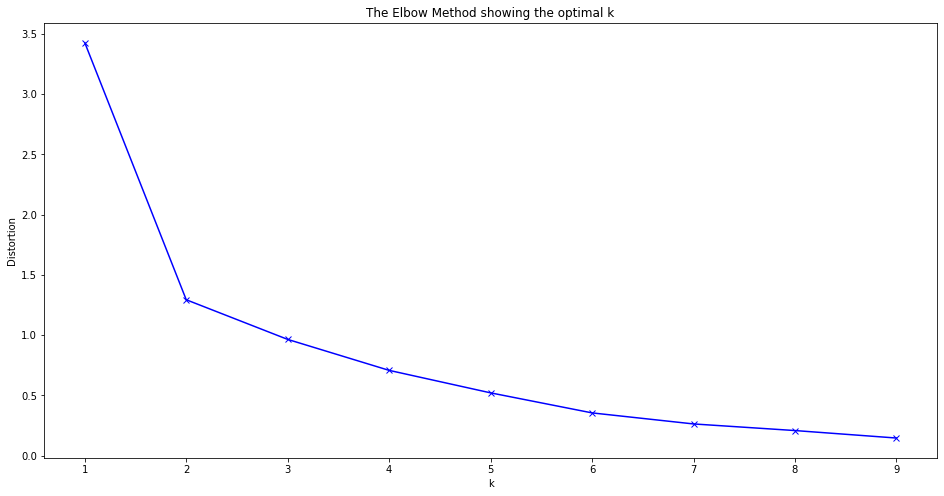

In [49]:
distortions = []

K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

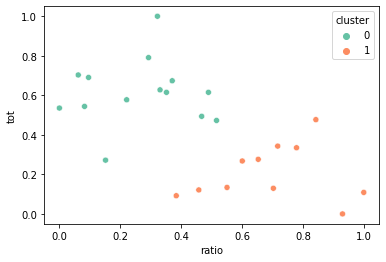

In [52]:
# k-means clustering 실행
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)

# 결과 확인
result_by_sklearn = scaled_data.copy()
result_by_sklearn["cluster"] = kmeans.labels_

result_by_sklearn.sort_values(by = 'cluster')

sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set2");

***<<<스케일링을 통해서 다른 결과가 도출되는 것 같지 않음>>>***

# 4. 실루엣 분석으로 최적의 군집 수 찾기

## 1) 실루엣 분석 하는법

sklearn을 이용해서 실루엣 분석

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [56]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data2)

# 결과 확인
result_by_sklearn = data2.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.sort_values(by = 'cluster')

,ratio,tot,cluster
CTY_NM,,,
종로구,223.176595,216,0
은평구,184.450518,249,0
관악구,232.544572,250,0
도봉구,214.057018,218,0
동작구,177.251917,254,0
강남구,117.501236,304,1
영등포구,162.996595,297,1
양천구,120.534893,266,1
송파구,122.487458,301,1


In [63]:
score_samples = silhouette_samples(data2.to_numpy(), result_by_sklearn['cluster'])
print(score_samples.shape)
print(score_samples)

(25,)
[ 0.59956602  0.21646911  0.64228471  0.53654111  0.50736515  0.51359264
  0.06785442  0.00919161  0.38817173  0.34902793  0.12256404  0.27340844
  0.47929869  0.55234089  0.44358105  0.48169022  0.42203807  0.61016837
  0.46513236  0.47878675  0.48953009  0.44627259  0.33527853  0.6495628
 -0.04716285]


In [70]:
# result_by_sklearn에 실루엣 계수 열 추가
result_by_sklearn['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.  
average_score = silhouette_score(data2.to_numpy(), result_by_sklearn['cluster'])
print('데이터셋 Silhouette Analysis Score:', average_score)

데이터셋 Silhouette Analysis Score: 0.40130217935257323


In [69]:
result_by_sklearn.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.382271
1    0.452075
2    0.265218
3    0.645924
Name: silhouette_coeff, dtype: float64

## 2) 시각화를 통해 군집의 개수 정하기

### a. 시각화 함수

In [78]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

### b. 결과

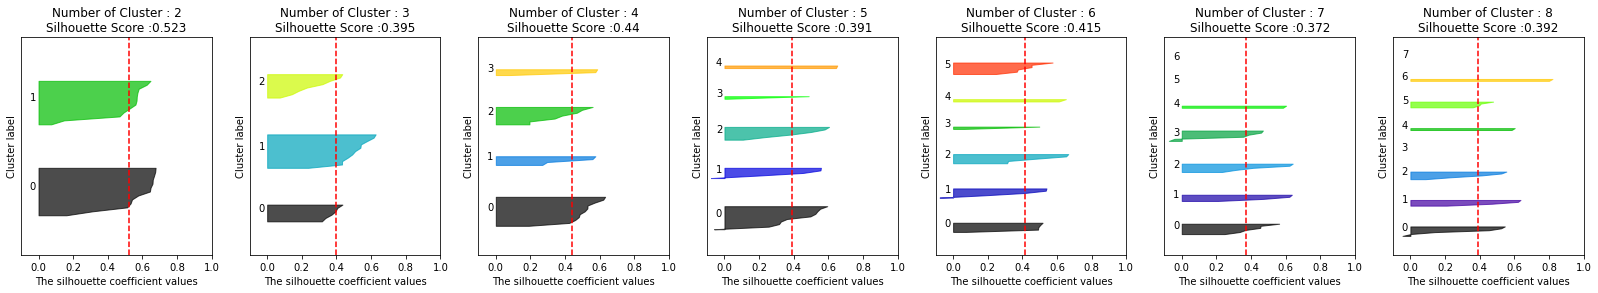

In [79]:
visualize_silhouette([2,3,4,5,6,7,8 ], data2.to_numpy())


- 결과적으로 2개의 군집으로 나누는 것이 elbow method나 sulhouette Score에서 가장 적절한 양상을 보이고 있다
- 다만 우선순위를 정하는 분석의 목적과 군집의 갯수가 적절하지 않다고 판단.
- 4, 6 군집으로 진행하는 것이 적절하다고 판단된다.


<span style="color:red"> **6 군집은 각 군집다마 2~6개 구가 할당, 향후 분석은 6군집으로 진행한다.**</span>

<span style="color:red"> **스케일링으로 큰 차이가 없기 때문에 기존 원본파일로 진행한다.**</span>

# 5. k-means 클러스터링

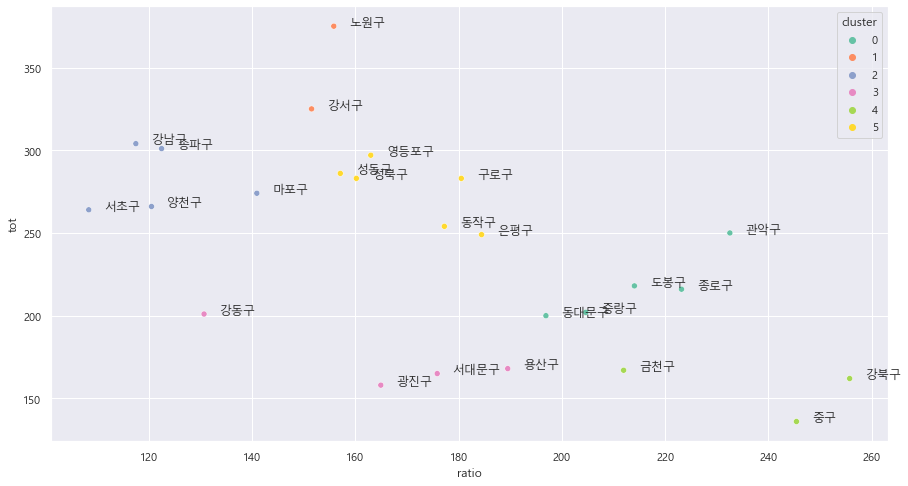

In [127]:
# k=4로 k-means clustering 실행
kmeans = KMeans(n_clusters=6)
kmeans.fit(data2)

# 결과 확인
result_by_sklearn = data2.copy()
result_by_sklearn["cluster"] = kmeans.labels_

result_by_sklearn.sort_values(by = 'cluster')

sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'

ax = sns.scatterplot(x="ratio", y="tot", hue="cluster", data=result_by_sklearn, palette="Set2")
for a,b,c in zip(result_by_sklearn.ratio, result_by_sklearn.tot, result_by_sklearn.index):
    ax.text(a+3, b, c)

In [129]:
result_by_sklearn.sort_values(by = 'cluster')

,ratio,tot,cluster
CTY_NM,,,
중랑구,204.636419,202,0
종로구,223.176595,216,0
관악구,232.544572,250,0
동대문구,196.919653,200,0
도봉구,214.057018,218,0
강서구,151.529412,325,1
노원구,155.835207,375,1
양천구,120.534893,266,2
송파구,122.487458,301,2
